# Business Question: Should we focus our efforts more on the mobile app or on the website as marketting and selling of our products?

In [1]:
from azureml import Workspace
ws = Workspace()

# Import Python Library for analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis

In [6]:
customers = ws.datasets['Ecommerce_Customers.csv']

In [9]:
customers = customers.to_dataframe()

# Prepare the data for each registered user with aggregated information as below.

In [11]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [16]:
# Email (Customerâs email id)
# Address (Customerâs home address)
# Avatar (Colour selected by customer on their member profile)
# Average session length (Minutes spent by customer on average for each in-store session)
# Time on App (Minutes spent by customer on the app)
# Time on Website (Minutes spent by customer on the website)
# Length of Membership (Years the customer has been registered)
# Yearly Amount Spent (Total Money spent yearly by customer)

In [12]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [14]:
customers.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

# 1. On Average, user spends 499$ 


In [15]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Explore relationship between columns

# looks like the length of membership is the strongest correlated feature with the yearly amount spent.

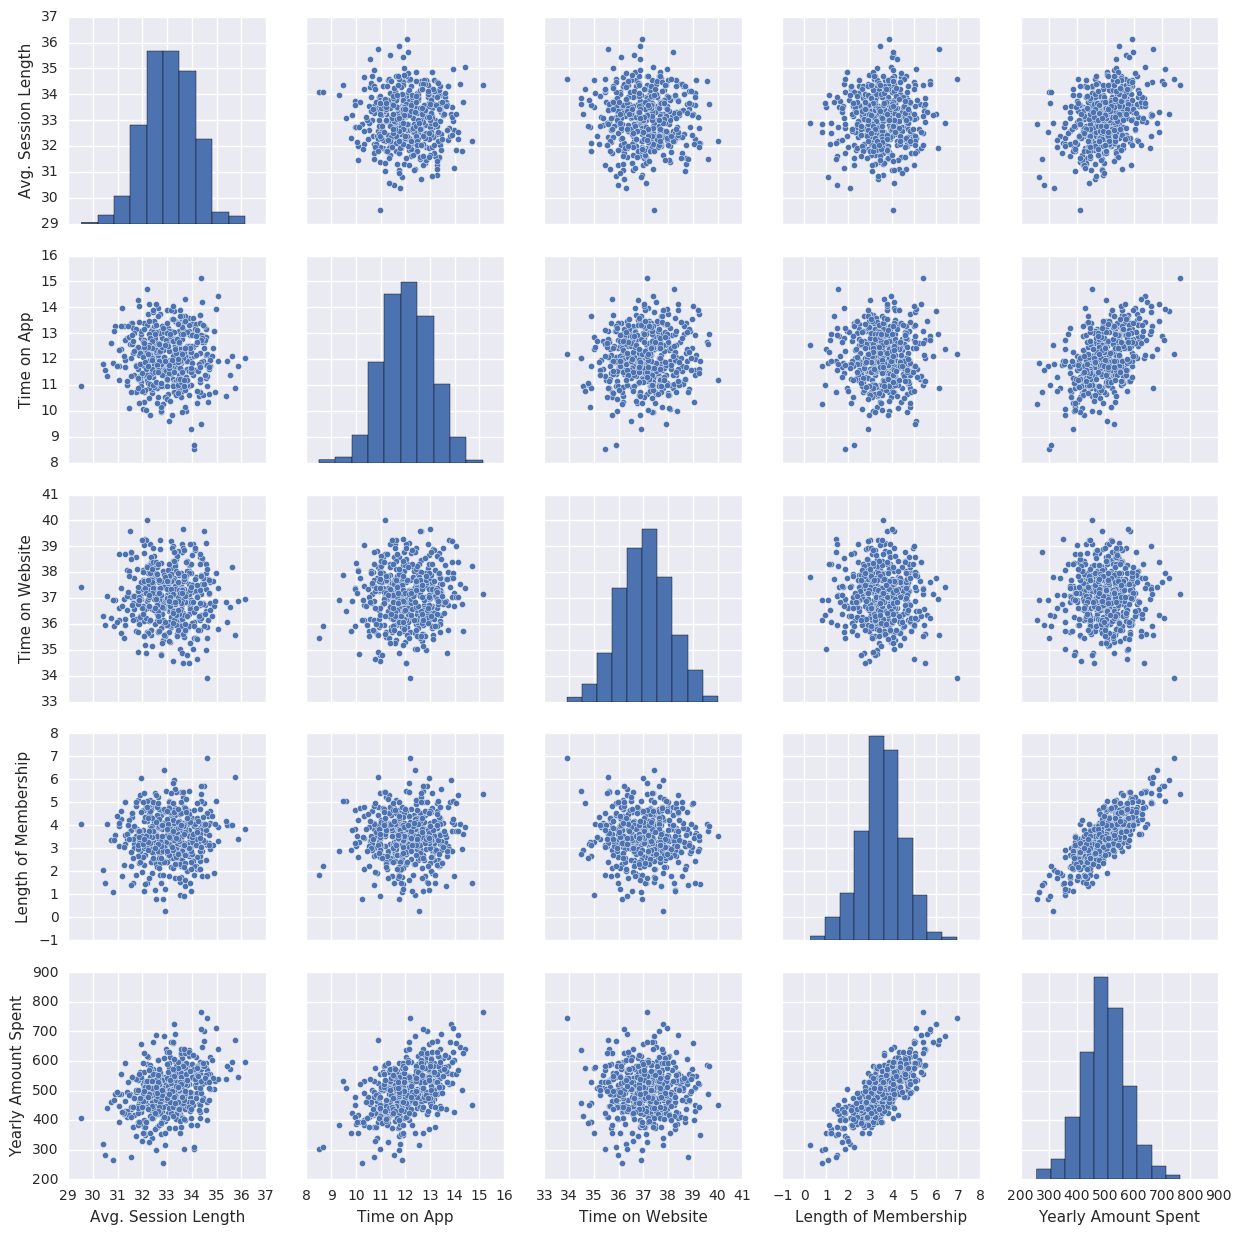

In [22]:
sns.pairplot(customers)
sns.plt.show()

# Modelling:  Goal to increase yearly amount spent for each customer, so we can use that feature as the dependent variable

In [23]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']] 
y = customers[['Yearly Amount Spent']]

# Split the X and y dataframes into training and test sets

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Building and training Linear Regression model

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()

In [29]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# check the coefficients, because they tell us how influential each feature is over the yearly amount spent

In [32]:
lm.coef_

array([[ 25.98154972,  38.59015875,   0.19040528,  61.27909654]])

# Testing our model

In [33]:
predictions = lm.predict(X_test)

# Evaluate the Model
Model is a pretty good fit

In [34]:
from sklearn import metrics

In [35]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
rmse

8.9338150669786511

# Residual Analysis
The residual graph is quite normally distributed, so we can now move on to the last step

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


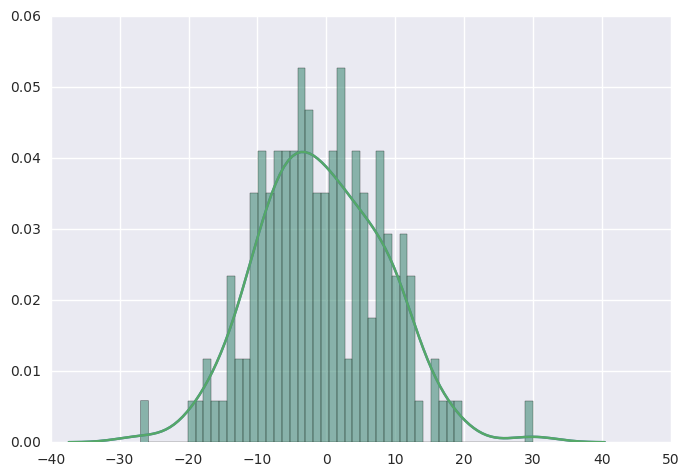

In [37]:
sns.distplot(y_test-predictions, bins=50, kde=True)
sns.plt.show()


# Making the decision

In [38]:
coeffs = pd.DataFrame(data=lm.coef_.transpose(), index=X.columns, columns=['Coefficient'])
coeffs

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


# From these coefficients, we can see that 1 minute on the app corresponds to 38.59 in revenue increase, whereas 1 minute on the website corresponds to just 0.19 in revenue increase. 

# Therefore, it is pretty clear from our linear regression model that if we wants to increase profits, they should focus their efforts more on their app.